# Import Packages

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load the Dataset

In [42]:
data=pd.read_csv("datasets/train-data.csv",encoding='ANSI')

## some instances of dataset or first five rows of the dataset

In [43]:
data.head()

,S_number,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,paint_color,type,condition
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,blue,other,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,blue,convertible,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,blue,NaN,excellent
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,orange,SUV,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,NaN,NaN,NaN


# Describe the data

In [44]:
data.describe()

,S_number,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


# Remove the useless columns

In [45]:
data.drop('S_number',axis=1,inplace=True)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,paint_color,type,condition
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,blue,other,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,blue,convertible,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,blue,NaN,excellent
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,orange,SUV,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,NaN,NaN,NaN


## names of all column present after removing insignificant columns 

In [46]:
data.columns


Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'paint_color', 'type', 'condition'],
      dtype='object')

## remove all duplicates

In [50]:
#shape of data before removing duplicates
data.shape

(6019, 16)

In [47]:
data_dup=data.drop_duplicates()
data_dup.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,paint_color,type,condition
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,blue,other,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,blue,convertible,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,blue,NaN,excellent
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,orange,SUV,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,NaN,NaN,NaN


In [51]:
# shape of the data after removing duplicates
data_dup.shape

(6019, 16)

## removing outliners

In [53]:
data_dup=data_dup[(data_dup.Year<=2020) 
                          & (data_dup.Year>=2000) 
                          & (data_dup.Price>=.75) 
                          & (data_dup.Price<=32)]
data_dup.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,paint_color,type,condition
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,blue,other,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,blue,convertible,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,blue,NaN,excellent
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,orange,SUV,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,NaN,NaN,NaN


In [54]:
#shape of data after outlining
data_dup.shape

(5686, 16)

# checking for missing values in each column

In [56]:
data_dup.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 34
Power                  34
Seats                  40
New_Price            4938
Price                   0
paint_color          1994
type                 1349
condition            2413
dtype: int64

# remove rows having 'any' missing values

In [58]:
data_dup.dropna(axis=0,how='any',inplace=True)
data_dup.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
paint_color          0
type                 0
condition            0
dtype: int64

In [59]:
#shape
data_dup.shape

(319, 16)

## check for datatype of dataset and datatype of each column of dataset

In [60]:
print(type(data_dup))
data_dup.dtypes

<class 'pandas.core.frame.DataFrame'>


Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
paint_color           object
type                  object
condition             object
dtype: object

In [61]:
%matplotlib inline

Name
Maruti Wagon R VXI                   8
Hyundai Grand i10 1.2 Kappa Magna    7
Maruti Alto K10 VXI                  5
BMW 3 Series 320d Luxury Line        5
Maruti Vitara Brezza ZDi Plus        5
Name: Name, dtype: int64


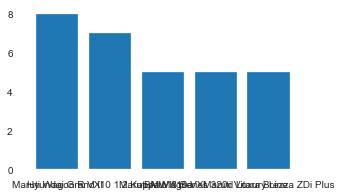

Location
Mumbai        56
Kochi         51
Coimbatore    44
Hyderabad     35
Delhi         27
Name: Location, dtype: int64


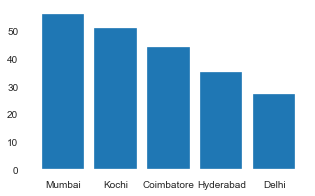

Year
2017    88
2016    62
2018    51
2015    29
2014    24
Name: Year, dtype: int64


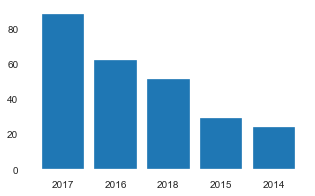

Kilometers_Driven
45000    7
30000    5
55000    5
28000    4
40000    4
Name: Kilometers_Driven, dtype: int64


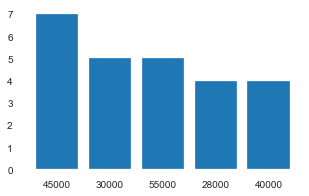

Fuel_Type
Diesel    167
Petrol    147
CNG         5
Name: Fuel_Type, dtype: int64


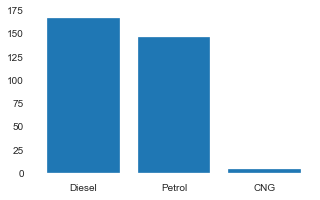

Transmission
Manual       219
Automatic    100
Name: Transmission, dtype: int64


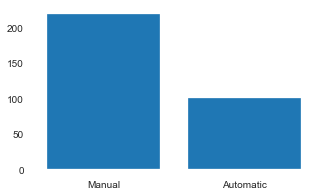

Owner_Type
First     295
Second     24
Name: Owner_Type, dtype: int64


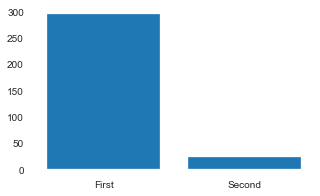

Mileage
18.9 kmpl     17
24.3 kmpl     15
22.5 kmpl     13
13.68 kmpl    12
28.4 kmpl     12
Name: Mileage, dtype: int64


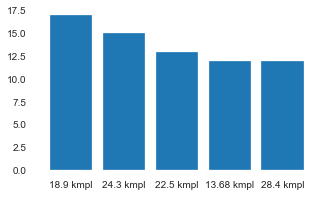

Engine
1248 CC    40
1197 CC    37
998 CC     26
1498 CC    21
1995 CC    21
Name: Engine, dtype: int64


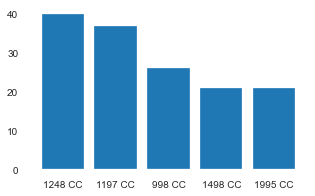

Power
190 bhp      22
67.04 bhp    21
81.86 bhp    20
88.5 bhp     17
74 bhp       14
Name: Power, dtype: int64


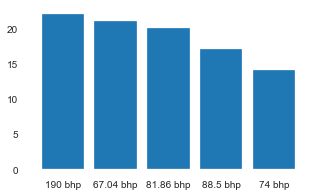

Seats
5.0    259
7.0     49
8.0      4
4.0      4
6.0      3
Name: Seats, dtype: int64


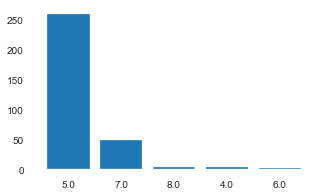

New_Price
11.26 Lakh    4
24.01 Lakh    3
54.43 Lakh    3
48.18 Lakh    3
8.18 Lakh     3
Name: New_Price, dtype: int64


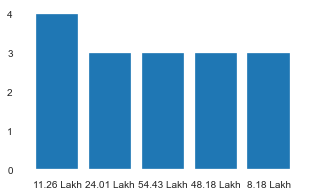

Price
5.00    7
3.25    5
3.50    5
4.50    4
3.75    4
Name: Price, dtype: int64


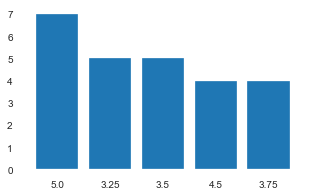

paint_color
white     78
black     72
silver    46
grey      39
blue      26
Name: paint_color, dtype: int64


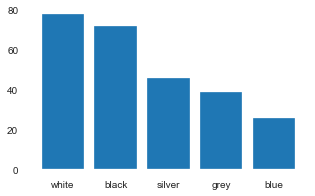

type
sedan     81
SUV       62
pickup    48
truck     37
other     25
Name: type, dtype: int64


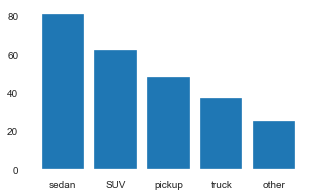

condition
good         171
excellent    118
like new      20
fair           8
salvage        1
Name: condition, dtype: int64


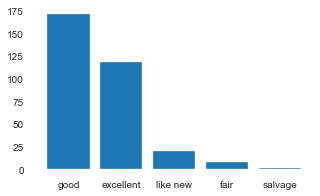

In [63]:
categories = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'paint_color', 'type', 'condition']

for i, c in enumerate(categories):
    v = data_dup[c].unique()
    g = data_dup.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))
    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    plt.xticks(r, g.index)
    plt.show()